In [1]:
# %cd \\sodfsv10\先端解析Ｇ\01_計算科学DB\080.チーム共有\90.AI開発T\解析プログラム

In [2]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.svm import SVR

from sklearn_expansion.experimental_design import create_optimal_design
from sklearn_expansion.experimental_design import BayesianOptimization
from sklearn_expansion import experimental_design
from sklearn_expansion.ensemble import MultiRegressor

In [3]:
import random
import numpy as np
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error

In [4]:
X, y = load_diabetes(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=10)
X_design_space = X_test
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
n_y = 1
print(max(y))
print(min(y))
print(X[0])

print(max(y_train))
print(min(y_train))



(10, 10)
(432, 10)
(10,)
(432,)
346.0
25.0
[ 0.03807591  0.05068012  0.06169621  0.02187235 -0.0442235  -0.03482076
 -0.04340085 -0.00259226  0.01990842 -0.01764613]
216.0
61.0


In [5]:
# 完全にデータを学習した決定木を作成しておく
# ベイズ最適化結果の答え合わせ用
tree = DecisionTreeRegressor(max_depth=30)
tree.fit(X,y)
print(mean_absolute_error(y, tree.predict(X)))

0.0


In [6]:
# yが高い30データを抽出
Xy_df = pd.DataFrame(np.concatenate([X,y.reshape(-1,1)], axis=1))
Xy_columns = Xy_df.columns
Xy_df = Xy_df.sort_values(by=Xy_columns[-1], ascending=False)

high_y_df = Xy_df.iloc[:15,:]
X_high = high_y_df.iloc[:,:-1]
y_high = high_y_df.iloc[:,-1]
X_high

,0,1,2,3,4,5,6,7,8,9
256,-0.049105,-0.044642,0.160855,-0.046985,-0.029088,-0.019790,-0.047082,0.034309,0.028017,0.011349
32,0.034443,0.050680,0.125287,0.028758,-0.053855,-0.012900,-0.102307,0.108111,0.000271,0.027917
138,0.034443,0.050680,0.111276,0.076958,-0.031840,-0.033881,-0.021311,-0.002592,0.028017,0.073480
290,0.059871,0.050680,0.076786,0.025315,0.001183,0.016849,-0.054446,0.034309,0.029936,0.044485
362,0.019913,0.050680,0.104809,0.070073,-0.035968,-0.026679,-0.024993,-0.002592,0.003712,0.040343
141,-0.027310,-0.044642,0.047685,-0.046985,0.034206,0.057245,-0.080217,0.130252,0.045066,0.131470
359,0.038076,0.050680,0.005650,0.032201,0.006687,0.017475,-0.024993,0.034309,0.014823,0.061054
9,-0.070900,-0.044642,0.039062,-0.033214,-0.012577,-0.034508,-0.024993,-0.002592,0.067736,-0.013504
428,0.048974,0.050680,0.088642,0.087287,0.035582,0.021546,-0.024993,0.034309,0.066048,0.131470
254,0.030811,0.050680,0.056307,0.076958,0.049341,-0.012274,-0.036038,0.071210,0.120053,0.090049


In [7]:
kernels = BayesianOptimization.kernels()
kernel = kernels[4]
bo = BayesianOptimization()
print(kernel)

1**2 * RBF(length_scale=1) + WhiteKernel(noise_level=1) + 1**2 * DotProduct(sigma_0=1)


In [8]:
n_y=1
n_suggestion = 15
estimator = GaussianProcessRegressor(alpha=0,
                                             kernel=kernel,
                                             random_state=None,
                                             optimizer='fmin_l_bfgs_b')



target_ranges = [{"lower":250, "upper":np.inf}]

next_Xs = bo.kriging_believer_algorithm(estimator=estimator,
                                        X=X_train,
                                        y=y_train,
                                        n_y=n_y,
                                        X_design=X_design_space,
                                        target_ranges=target_ranges,
                                        acquisition_function="PTR",
                                        n_suggestion=n_suggestion)


C:\Users\11665307\Anaconda3\envs\py37_test\lib\site-packages\sklearn\gaussian_process\kernels.py:409: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k1__k1__constant_value is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  ConvergenceWarning)
C:\Users\11665307\Anaconda3\envs\py37_test\lib\site-packages\sklearn\gaussian_process\kernels.py:409: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k1__k1__constant_value is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  ConvergenceWarning)
C:\Users\11665307\Anaconda3\envs\py37_test\lib\site-packages\sklearn\gaussian_process\kernels.py:409: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k1__k1__constant_value is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  Convergen

In [9]:
PTR_candidates = pd.DataFrame(next_Xs)
PTR_candidates
PTR_predicts = pd.DataFrame(tree.predict(PTR_candidates))

pd.concat([PTR_candidates, PTR_predicts], axis=1)

,0,1,2,3,4,5,6,7,8,9,0
0,0.096197,-0.044642,0.051996,0.079254,0.054845,0.036577,-0.076536,0.141322,0.098646,0.061054,230.0
1,0.074401,-0.044642,0.031517,0.101058,0.046589,0.036890,0.015505,-0.002592,0.033657,0.044485,296.0
2,0.074401,-0.044642,0.034751,0.094173,0.057597,0.020293,0.022869,-0.002592,0.073802,-0.021788,236.0
3,0.074401,-0.044642,0.114509,0.028758,0.024574,0.024991,0.019187,-0.002592,-0.000609,-0.005220,237.0
4,0.074401,-0.044642,0.018584,0.063187,0.061725,0.042840,0.008142,-0.002592,0.058039,-0.059067,248.0
5,0.005383,0.050680,0.034751,-0.001080,0.152538,0.198788,-0.061809,0.185234,0.015567,0.073480,84.0
6,0.063504,0.050680,0.088642,0.070073,0.020446,0.037517,-0.050764,0.071210,0.029300,0.073480,264.0
7,0.074401,-0.044642,0.085408,0.063187,0.014942,0.013091,0.015505,-0.002592,0.006209,0.085907,261.0
8,0.063504,0.050680,-0.001895,0.066630,0.090620,0.108914,0.022869,0.017703,-0.035817,0.003064,63.0
9,0.059871,-0.044642,-0.021295,0.087287,0.045213,0.031567,-0.047082,0.071210,0.079121,0.135612,281.0


In [18]:
n_y=1
n_suggestion = 15
estimator = SVR()
Bag_estimator = BaggingRegressor(estimator, n_estimators=10)
Multi_estimator = MultiRegressor(Bag_estimator)
target_ranges = [{"lower":250, "upper":np.inf}]

next_Xs = bo.kriging_believer_algorithm(estimator=Multi_estimator,
                                        X=X_train,
                                        y=y_train,
                                        n_y=n_y,
                                        X_design=X_design_space,
                                        target_ranges=target_ranges,
                                        acquisition_function="PTR",
                                        n_suggestion=n_suggestion)


C:\Users\11665307\Anaconda3\envs\py37_test\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\11665307\Anaconda3\envs\py37_test\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\11665307\Anaconda3\envs\py37_test\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\11665307\Anaconda3\envs\py37_test\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expe

In [11]:
SVR_candidates = pd.DataFrame(next_Xs)
SVR_candidates
SVR_predicts = pd.DataFrame(tree.predict(SVR_candidates))

pd.concat([SVR_candidates, SVR_predicts], axis=1)

,0,1,2,3,4,5,6,7,8,9,0
0,-0.078165,-0.044642,-0.040696,-0.081414,-0.100638,-0.112795,0.022869,-0.076395,-0.020289,-0.050783,152.0
1,-0.020045,-0.044642,0.018584,0.090730,0.003935,0.008707,0.037595,-0.039493,-0.057800,0.007207,113.0
2,-0.023677,-0.044642,0.030440,-0.005671,0.082364,0.092004,-0.017629,0.071210,0.033047,0.003064,122.0
3,-0.089063,-0.044642,-0.061174,-0.026328,-0.055231,-0.054549,0.041277,-0.076395,-0.093936,-0.054925,99.0
4,0.023546,-0.044642,0.110198,0.063187,0.013567,-0.032942,-0.024993,0.020655,0.099240,0.023775,258.0
5,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0
6,-0.092695,-0.044642,-0.081653,-0.057314,-0.060735,-0.068014,0.048640,-0.076395,-0.066488,-0.021788,85.0
7,0.041708,0.050680,-0.022373,0.028758,-0.066239,-0.045155,-0.061809,-0.002592,0.002864,-0.054925,156.0
8,-0.020045,-0.044642,0.004572,0.097616,0.005311,-0.020729,0.063367,-0.039493,0.012553,0.011349,48.0
9,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930,220.0


In [12]:
n_y=1
n_suggestion = 15
estimator = model = GaussianProcessRegressor(alpha=0,
                                             kernel=kernel,
                                             random_state=None,
                                             optimizer='fmin_l_bfgs_b')



next_Xs = bo.kriging_believer_algorithm(estimator=estimator,
                                        X=X_train,
                                        y=y_train,
                                        n_y=n_y,
                                        X_design=X_design_space,
                                        acquisition_function="EI",
                                        n_suggestion=n_suggestion)

C:\Users\11665307\Anaconda3\envs\py37_test\lib\site-packages\sklearn\gaussian_process\kernels.py:409: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k1__k1__constant_value is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  ConvergenceWarning)
C:\Users\11665307\Anaconda3\envs\py37_test\lib\site-packages\sklearn\gaussian_process\kernels.py:409: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k1__k1__constant_value is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  ConvergenceWarning)
C:\Users\11665307\Anaconda3\envs\py37_test\lib\site-packages\sklearn\gaussian_process\kernels.py:409: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k1__k1__constant_value is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  Convergen

In [13]:
EI_candidates = pd.DataFrame(next_Xs)
EI_candidates
EI_predicts = pd.DataFrame(tree.predict(EI_candidates))

pd.concat([EI_candidates, EI_predicts], axis=1)

,0,1,2,3,4,5,6,7,8,9,0
0,0.067136,0.050680,-0.006206,0.063187,-0.042848,-0.095885,0.052322,-0.076395,0.059424,0.052770,283.0
1,0.096197,-0.044642,0.051996,0.079254,0.054845,0.036577,-0.076536,0.141322,0.098646,0.061054,230.0
2,0.081666,0.050680,0.001339,0.035644,0.126395,0.091065,0.019187,0.034309,0.084495,-0.030072,196.0
3,0.023546,0.050680,0.061696,0.062039,0.024574,-0.036073,-0.091262,0.155345,0.133396,0.081764,242.0
4,0.048974,0.050680,0.123131,0.083844,-0.104765,-0.100895,-0.069172,-0.002592,0.036646,-0.030072,281.0
5,0.005383,0.050680,0.034751,-0.001080,0.152538,0.198788,-0.061809,0.185234,0.015567,0.073480,84.0
6,0.041708,-0.044642,-0.064408,0.035644,0.012191,-0.057994,0.181179,-0.076395,-0.000609,-0.050783,170.0
7,-0.060003,0.050680,-0.047163,-0.022885,-0.071743,-0.057681,-0.006584,-0.039493,-0.062913,-0.054925,72.0
8,0.074401,-0.044642,0.114509,0.028758,0.024574,0.024991,0.019187,-0.002592,-0.000609,-0.005220,237.0
9,0.009016,0.050680,0.018584,0.039087,0.017694,0.010586,0.019187,-0.002592,0.016305,-0.017646,265.0


In [14]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [15]:
pca =PCA(n_components=2)

In [16]:
X_train_pca = pca.fit_transform(X_train)
X_ptr_pca = pca.transform(PTR_candidates)
X_ei_pca = pca.transform(EI_candidates)
X_high_pca = pca.transform(X_high)
X_SVR_PCA = pca.transform(SVR_candidates)

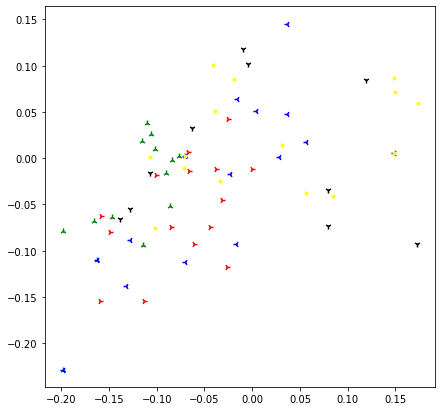

In [17]:
plt.figure(figsize=(7,7))
plt.scatter(X_train_pca[:,0],X_train_pca[:,1],c="black", marker="1")
plt.scatter(X_ptr_pca[:,0],X_ptr_pca[:,1],c="green", marker="2")
plt.scatter(X_ei_pca[:,0],X_ei_pca[:,1],c="blue", marker="3")
plt.scatter(X_high_pca[:,0],X_high_pca[:,1],c="red", marker="4")
plt.scatter(X_SVR_PCA[:,0],X_SVR_PCA[:,1],c="yellow", marker=".")
